In [1]:
# utilities
import os
import pandas as pd
import xcube
import IPython.display
import shapely.geometry
import xarray
import matplotlib
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, IntSlider, Label
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from xcube.version import version
version

'0.12.1'

In [3]:
ds = xarray.open_zarr("/storage_extension/s3files/snapgpt_xcube/batchproc/cubes/06months/cube06months.zarr")
#ds = ds.dropna(dim="lat", how="all")
#ds = ds.dropna(dim="lon", how="all")
#ds = ds.dropna(dim="time", how="all")

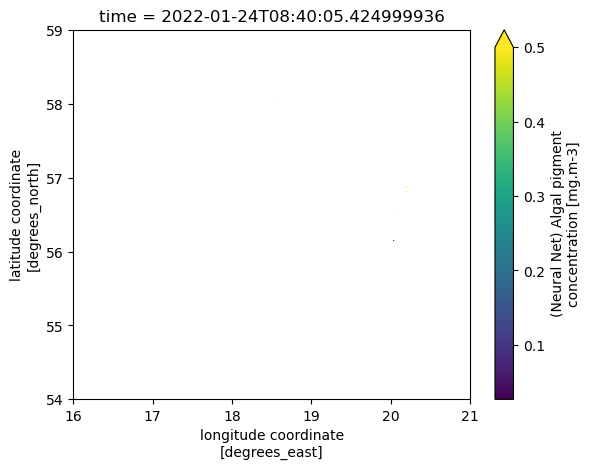

In [4]:
ds.CHL_NN.isel(time=50).plot(vmax=.5)

In [5]:
hum_timeseries= ds.humidity.sel(lat="56.5",lon="18.5", time=ds.humidity.time[:] ,method="nearest")

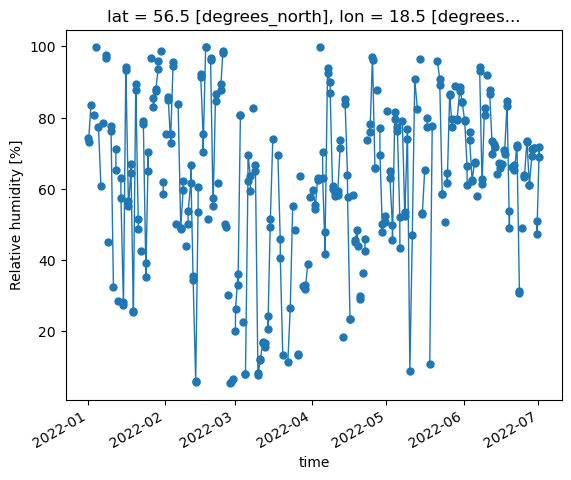

In [6]:
hum_timeseries.plot.line(linewidth=1, markersize=5, marker='o')
#hum_timeseries.plot.scatter()

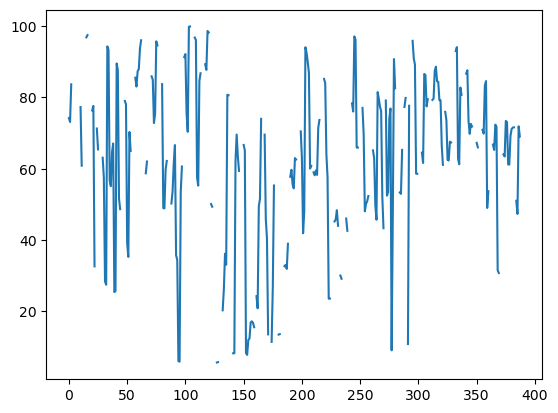

In [7]:
plt.plot(hum_timeseries)

In [8]:
def get_time(time):
    return ds.time.dt.strftime('%Y-%m-%d %H:%M:%S').values[time]

def plot_data(var, time):
    time = pd.to_datetime(ds.time.values[time])
    data = ds[var].sel(time=time, method='nearest')
    plt.imshow(data)
    plt.title(var + ' at ' + str(time))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

variable_widget = Dropdown(options=list(ds.data_vars))
time_label = Label()
def update_time_label(change):
    time_label.value = get_time(change.new)

time_widget = IntSlider(min=0, max=ds.time.size-1, step=1, continuous_update=False)
time_widget.observe(update_time_label, names='value')
interact(plot_data, var=variable_widget, time=time_widget)
#from IPython.display import display

interactive(children=(Dropdown(description='var', options=('A865', 'ADG443_NN', 'CHL_NN', 'CHL_OC4ME', 'IWV', …

<function __main__.plot_data(var, time)>